# Exponential Moving Average (EMA) for Stocks

## Import libraries

In [ ]:
pip install yfinance

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

## Load stock data

In [3]:
ticker = "AAPL"
aapl_df = yf.download(tickers=ticker, period="max", interval="1d", group_by="ticker", auto_adjust=True)
aapl_df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
1980-12-12,0.100600,0.101037,0.100600,0.100600,469033600
1980-12-15,0.095789,0.095789,0.095352,0.095352,175884800
1980-12-16,0.088790,0.088790,0.088353,0.088353,105728000
1980-12-17,0.090540,0.090977,0.090540,0.090540,86441600
1980-12-18,0.093165,0.093602,0.093165,0.093165,73449600
...,...,...,...,...,...
2021-08-04,147.049692,147.568903,146.061168,146.730164,56368300
2021-08-05,146.760114,147.618828,145.951328,146.839996,46397700
2021-08-06,146.350006,147.110001,145.630005,146.139999,54067400


In [4]:
aapl_df = aapl_df.loc["2019-01-01":]
aapl_df

,Open,High,Low,Close,Volume
Date,,,,,
2019-01-02,37.645792,38.608266,37.485379,38.382229,148158800
2019-01-03,34.994134,35.417039,34.512898,34.559078,365248800
2019-01-04,35.127801,36.104857,34.950376,36.034370,234428400
2019-01-07,36.141319,36.172916,35.460782,35.954170,219111200
2019-01-08,36.350336,36.899628,36.097567,36.639565,164101200
...,...,...,...,...,...
2021-08-04,147.049692,147.568903,146.061168,146.730164,56368300
2021-08-05,146.760114,147.618828,145.951328,146.839996,46397700
2021-08-06,146.350006,147.110001,145.630005,146.139999,54067400


## Visualise adjusted close prices

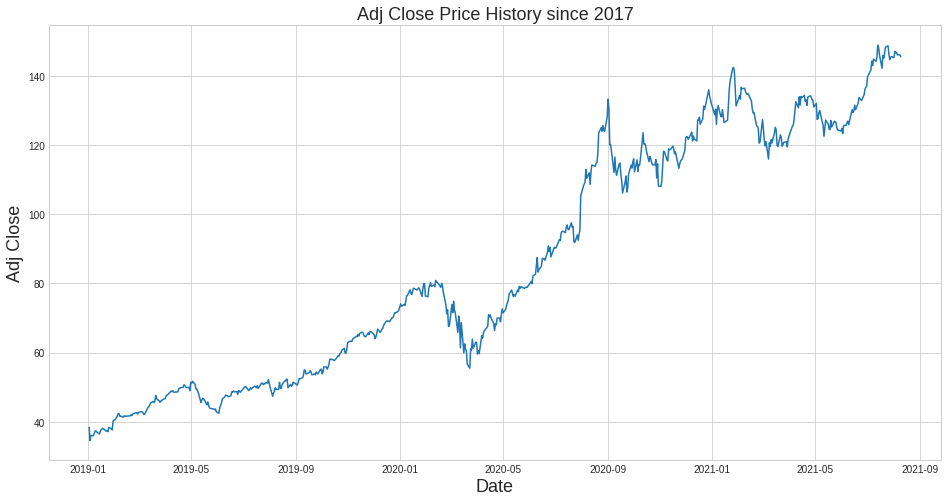

In [5]:
plt.figure(figsize=(16,8))
plt.title("Adj Close Price History since 2017", fontsize=18)
plt.plot(aapl_df["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Adj Close", fontsize=18)
plt.show()

## Exponential Moving Average (EMA)

In [6]:
def EMA(data, period, column="Close"):
  return data[column].ewm(span=period, adjust=False).mean()

In [ ]:
aapl_df.loc[:,"EMA100"] = EMA(aapl_df, 100)

In [ ]:
aapl_df.loc[:,"EMA350"] = EMA(aapl_df, 350)

In [11]:
aapl_df.head(10)

,Open,High,Low,Close,Volume,EMA100,EMA350
Date,,,,,,,
2019-01-02,37.645792,38.608266,37.485379,38.382229,148158800,38.382229,38.382229
2019-01-03,34.994134,35.417039,34.512898,34.559078,365248800,38.306523,38.360445
2019-01-04,35.127801,36.104857,34.950376,36.034370,234428400,38.261530,38.347191
2019-01-07,36.141319,36.172916,35.460782,35.954170,219111200,38.215839,38.333555
2019-01-08,36.350336,36.899628,36.097567,36.639565,164101200,38.184626,38.323903
2019-01-09,36.770813,37.558292,36.367355,37.261772,180396400,38.166352,38.317851
2019-01-10,37.064903,37.422185,36.666304,37.380867,143122800,38.150798,38.312512
2019-01-11,37.157264,37.356562,36.824285,37.013863,108092800,38.128284,38.305112
2019-01-14,36.663880,36.765960,36.267709,36.457287,129756800,38.095195,38.294583


## Visualise EMA on top of adjusted close prices

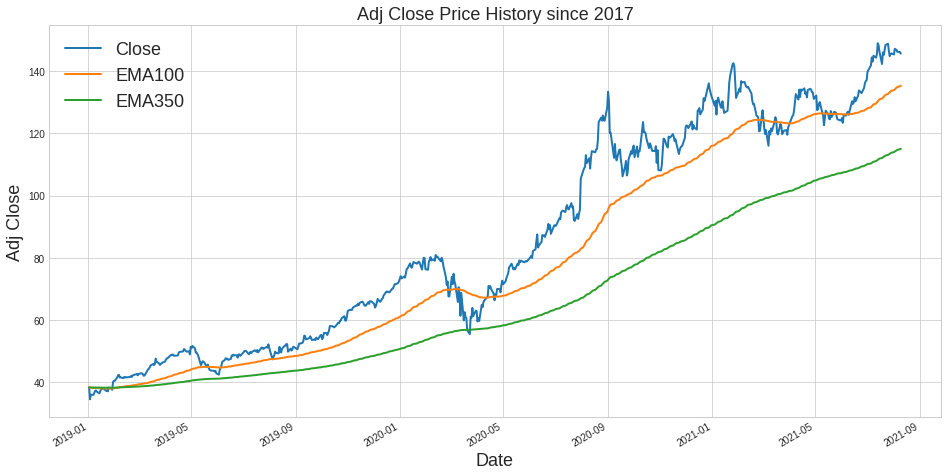

In [12]:
aapl_df.loc[:,("Close", "EMA100", "EMA350")].plot(figsize=(16,8), legend=True, linewidth=2)
plt.legend(fontsize=18)
plt.title("Adj Close Price History since 2017", fontsize=18)
plt.xlabel("Date", fontsize=18)
plt.ylabel("Adj Close", fontsize=18)
plt.show()